# Regression Using XG-Boost

What is XGBoost?

https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

Implementation of XGBoost

https://www.datacamp.com/community/tutorials/xgboost-in-python

## 1) Importing the libraries

In [0]:
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2) Data Preprocessing

In [0]:
df = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/train.csv')

In [71]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
cols = np.array(df.columns)
for col in cols:
  print(col , df[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [74]:
cols_to_del = []
for i in df.columns:
  if df[i].isnull().sum() > len(df)*0.5:
    cols_to_del.append(i)

cols_to_del    

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [0]:
for i in cols_to_del:
  df = df.drop(i,axis=1)

df = df.drop('Id',axis = 1)

In [76]:
cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0      object
LotFrontage         259     float64
LotArea              0       int64
Street               0      object
LotShape             0      object
LandContour           0      object
Utilities            0      object
LotConfig            0      object
LandSlope            0      object
Neighborhood           0      object
Condition1           0      object
Condition2           0      object
BldgType             0      object
HouseStyle           0      object
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0      object
RoofMatl             0      object
Exterior1st           0      object
Exterior2nd           0      object
MasVnrType           8      object
MasVnrArea           8     float64
ExterQual            0      object
ExterCond            0      object
Foundation           0      object
BsmtQual  

In [77]:
cat_cols = []

for col in df.columns:
  if df[col].dtype == 'O':
    cat_cols.append(col)

cat_cols    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [0]:
for col in cat_cols:
  df[col] = df[col].astype('category')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   category
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   category
 5   LotShape       1460 non-null   category
 6   LandContour    1460 non-null   category
 7   Utilities      1460 non-null   category
 8   LotConfig      1460 non-null   category
 9   LandSlope      1460 non-null   category
 10  Neighborhood   1460 non-null   category
 11  Condition1     1460 non-null   category
 12  Condition2     1460 non-null   category
 13  BldgType       1460 non-null   category
 14  HouseStyle     1460 non-null   category
 15  OverallQual    1460 non-null   int64   
 16  OverallCond    1460 non-null   int64   
 17  YearBuilt      1460 non-null   in

In [0]:
for col in cat_cols:
  df[col] = df[col].cat.codes.values

In [81]:
cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0        int8
LotFrontage         259     float64
LotArea              0       int64
Street               0        int8
LotShape             0        int8
LandContour           0        int8
Utilities            0        int8
LotConfig            0        int8
LandSlope            0        int8
Neighborhood           0        int8
Condition1           0        int8
Condition2           0        int8
BldgType             0        int8
HouseStyle           0        int8
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0        int8
RoofMatl             0        int8
Exterior1st           0        int8
Exterior2nd           0        int8
MasVnrType           0        int8
MasVnrArea           8     float64
ExterQual            0        int8
ExterCond            0        int8
Foundation           0        int8
BsmtQual  

In [82]:
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,-1,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,0,12,2008,8,4,250000
5,50,3,85.0,14115,1,0,3,0,4,0,11,2,2,0,0,5,5,1993,1995,1,1,12,13,2,0.0,3,4,5,2,3,3,2,732,5,0,64,796,1,0,1,4,796,566,0,1362,1,0,1,1,1,1,3,5,6,0,-1,1,1993.0,2,2,480,4,4,2,40,30,0,320,0,0,700,10,2009,8,4,143000
6,20,3,75.0,10084,1,3,3,0,4,0,21,2,2,0,2,8,5,2004,2005,1,1,12,13,3,186.0,2,4,2,0,3,0,2,1369,5,0,317,1686,1,0,1,4,1694,0,0,1694,1,0,2,0,3,1,2,7,6,1,2,1,2004.0,1,2,636,4,4,2,255,57,0,0,0,0,0,8,2007,8,4,307000
7,60,3,NaN,10382,1,0,3,0,0,0,14,4,2,0,5,7,6,1973,1973,1,1,6,6,3,240.0,3,4,1,2,3,2,0,859,1,32,216,1107,1,0,1,4,1107,983,0,2090,1,0,2,1,3,1,3,7,6,2,4,1,1973.0,1,2,484,4,4,2,235,204,228,0,0,0,350,11,2009,8,4,200000
8,50,4,51.0,6120,1,3,3,0,4,0,17,0,2,0,0,7,5,1931,1950,1,1,3,15,2,0.0,3,4,0,3,3,3,5,0,5,0,952,952,1,2,1,1,1022,752,0,1774,0,0,2,0,2,2,3,8,2,2,4,5,1931.0,2,2,468,1,4,2,90,0,205,0,0,0,0,4,2008,8,0,129900
9,190,3,50.0,7420,1,3,3,0,0,0,3,0,0,1,1,5,6,1939,1950,1,1,8,8,2,0.0,3,4,0,3,3,3,2,851,5,0,140,991,1,0,1,4,1077,0,0,1077,1,0,1,0,2,2,3,5,6,2,4,1,1939.0,1,1,205,2,4,2,0,4,0,0,0,0,0,1,2008,8,4,118000


In [0]:
X = df.drop('SalePrice',axis = 1)
y = np.log(df['SalePrice'])

In [16]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [0]:
input_data = xgb.DMatrix(data=X,label=y)

In [18]:
input_data

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.01,
                          max_depth = 15, 
                          alpha = 10, 
                          n_estimators = 1000)

In [34]:
xg_reg.fit(X_train,y_train)

[11:35:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg_reg.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.118473


In [37]:
params = {"objective":"reg:linear",
          'colsample_bytree': 0.3,
          'learning_rate': 0.01,
          'max_depth': 15, 
          'alpha': 10}

cv_results = xgb.cv(dtrain=input_data, 
                    params=params, 
                    nfold=5,
                    num_boost_round=1000,
                    early_stopping_rounds=10,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:35:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,11.415979,0.005527,11.415959,0.022355
1,11.302142,0.005469,11.302122,0.022411
2,11.189444,0.005413,11.189425,0.022463
3,11.077873,0.005357,11.077853,0.022517
4,10.967422,0.005302,10.967401,0.022567


In [39]:
print((cv_results["test-rmse-mean"]).tail(1))

999    0.149585
Name: test-rmse-mean, dtype: float64


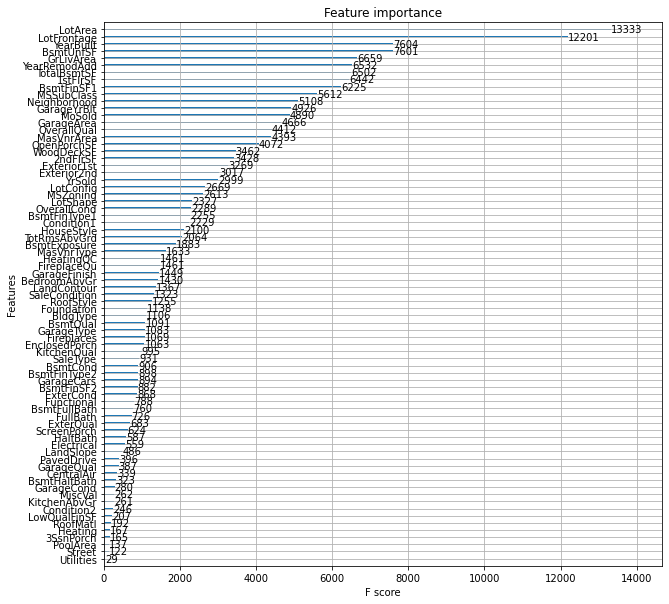

In [47]:
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [100, 100]
plt.show()

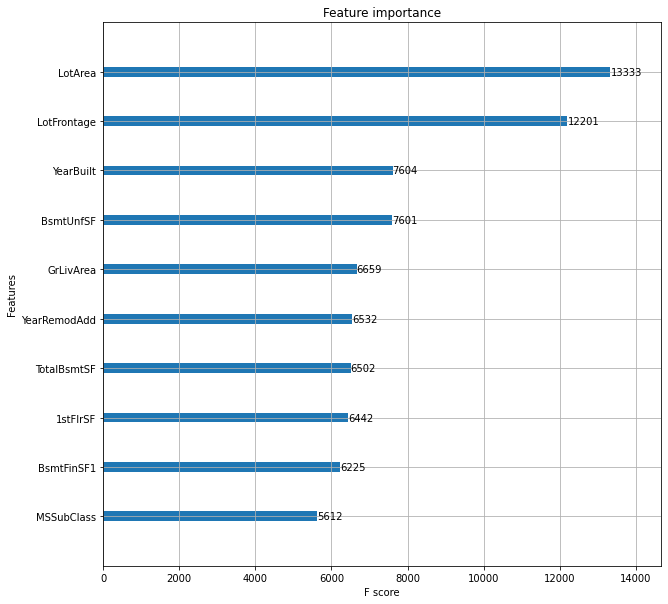

In [44]:
xgb.plot_importance(xg_reg,max_num_features=10)
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

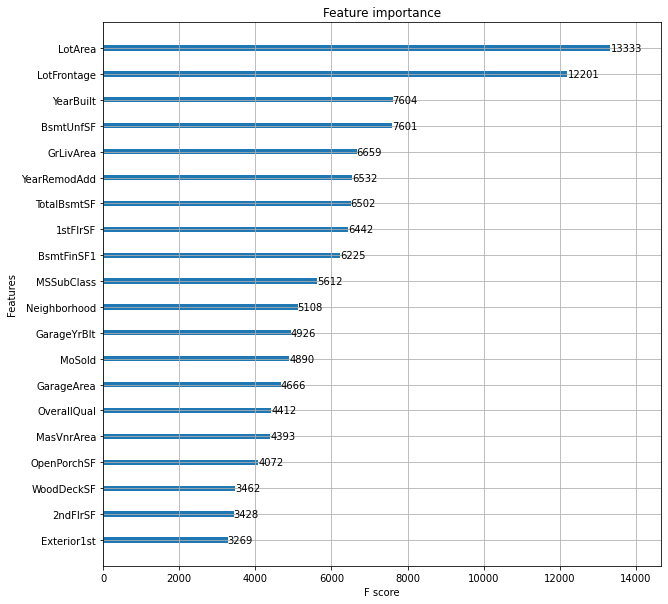

In [45]:
xgb.plot_importance(xg_reg,max_num_features=20)
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

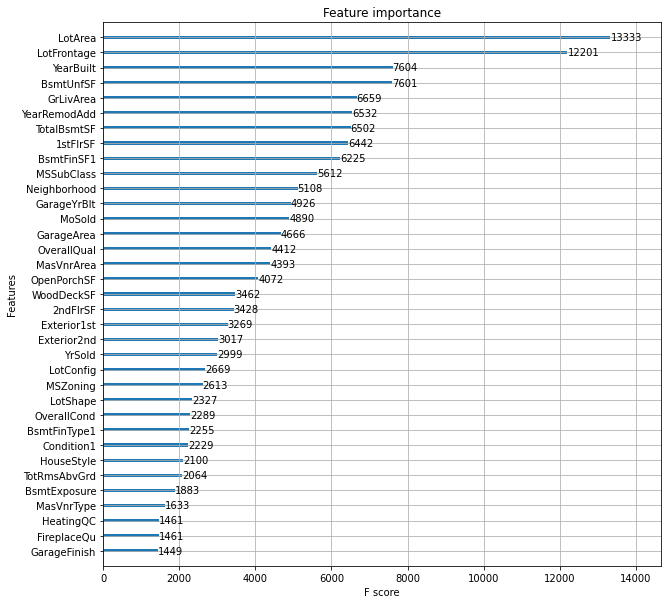

In [48]:
xgb.plot_importance(xg_reg,max_num_features=35)
# plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

## Using Grid Search CV for parameter tuning

In [0]:
# from sklearn.model_selection import GridSearchCV

In [55]:
"""
parameters = {'objective':['reg:linear'],
              'learning_rate': [0.1,0.01,0.05,0.001], #so called `eta` value
              'max_depth': [6,8,10,12],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.3,0.5,0.7],
              'n_estimators': [800,1000,1200,1500], #number of trees, change it to 1000 for better results
              'seed': [1337]}


reg = GridSearchCV(xg_reg, parameters, n_jobs=-1,scoring='neg_root_mean_squared_error',verbose=0,refit=True)

reg.fit(X_train, y_train)
"""

[13:18:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(alpha=10, base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.3, gamma=0,
                                    importance_type='gain', learning_rate=0.01,
                                    max_delta_step=0, max_depth=15,
                                    min_child_weight=1, missing=None,
                                    n_estimators=1000, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0...
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.1, 0.01, 0.05, 0.001],
                         'max_depth': [6, 8, 10, 12], 'min_child_weight': [11],
                         'n_estimators': [800, 1000, 1200, 1500],
                         'objective': ['reg:

In [0]:
#reg.cv_results_

In [64]:
print(type(reg.cv_results_))

<class 'dict'>


In [0]:
print(reg.cv_results_)

In [0]:
preds = reg.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error

value = np.sqrt(mean_squared_error(preds,y_test))

In [67]:
value

0.1175551405534492

## Going for Feature Selection and taking top 35 features as per xgboost

In [0]:
df = pd.read_csv('drive/My Drive/Pytorch_DataSet/house-prices/train.csv')

In [85]:
cols = np.array(df.columns)
for col in cols:
  print(col , df[col].isnull().sum())

Id 0
MSSubClass 0
MSZoning 0
LotFrontage 259
LotArea 0
Street 0
Alley 1369
LotShape 0
LandContour 0
Utilities 0
LotConfig 0
LandSlope 0
Neighborhood 0
Condition1 0
Condition2 0
BldgType 0
HouseStyle 0
OverallQual 0
OverallCond 0
YearBuilt 0
YearRemodAdd 0
RoofStyle 0
RoofMatl 0
Exterior1st 0
Exterior2nd 0
MasVnrType 8
MasVnrArea 8
ExterQual 0
ExterCond 0
Foundation 0
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinSF1 0
BsmtFinType2 38
BsmtFinSF2 0
BsmtUnfSF 0
TotalBsmtSF 0
Heating 0
HeatingQC 0
CentralAir 0
Electrical 1
1stFlrSF 0
2ndFlrSF 0
LowQualFinSF 0
GrLivArea 0
BsmtFullBath 0
BsmtHalfBath 0
FullBath 0
HalfBath 0
BedroomAbvGr 0
KitchenAbvGr 0
KitchenQual 0
TotRmsAbvGrd 0
Functional 0
Fireplaces 0
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageCars 0
GarageArea 0
GarageQual 81
GarageCond 81
PavedDrive 0
WoodDeckSF 0
OpenPorchSF 0
EnclosedPorch 0
3SsnPorch 0
ScreenPorch 0
PoolArea 0
PoolQC 1453
Fence 1179
MiscFeature 1406
MiscVal 0
MoSold 0
YrSol

In [86]:
cols_to_del = []
for i in df.columns:
  if df[i].isnull().sum() > len(df)*0.5:
    cols_to_del.append(i)

cols_to_del    

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [0]:
for i in cols_to_del:
  df = df.drop(i,axis=1)

df = df.drop('Id',axis = 1)

In [88]:
cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0      object
LotFrontage         259     float64
LotArea              0       int64
Street               0      object
LotShape             0      object
LandContour           0      object
Utilities            0      object
LotConfig            0      object
LandSlope            0      object
Neighborhood           0      object
Condition1           0      object
Condition2           0      object
BldgType             0      object
HouseStyle           0      object
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0      object
RoofMatl             0      object
Exterior1st           0      object
Exterior2nd           0      object
MasVnrType           8      object
MasVnrArea           8     float64
ExterQual            0      object
ExterCond            0      object
Foundation           0      object
BsmtQual  

In [89]:
cat_cols = []

for col in df.columns:
  if df[col].dtype == 'O':
    cat_cols.append(col)

cat_cols    

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [0]:
for col in cat_cols:
  df[col] = df[col].astype('category')

In [0]:
for col in cat_cols:
  df[col] = df[col].cat.codes.values

In [92]:
cols = np.array(df.columns)
for col in cols:
  print(f'{col:{10}}  {df[col].isnull().sum():{10}}  {str(df[col].dtype):>{10}}')

MSSubClass           0       int64
MSZoning             0        int8
LotFrontage         259     float64
LotArea              0       int64
Street               0        int8
LotShape             0        int8
LandContour           0        int8
Utilities            0        int8
LotConfig            0        int8
LandSlope            0        int8
Neighborhood           0        int8
Condition1           0        int8
Condition2           0        int8
BldgType             0        int8
HouseStyle           0        int8
OverallQual           0       int64
OverallCond           0       int64
YearBuilt            0       int64
YearRemodAdd           0       int64
RoofStyle            0        int8
RoofMatl             0        int8
Exterior1st           0        int8
Exterior2nd           0        int8
MasVnrType           0        int8
MasVnrArea           8     float64
ExterQual            0        int8
ExterCond            0        int8
Foundation           0        int8
BsmtQual  

In [93]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

to be done....

In [0]:
X = df[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'LotConfig',
       'Neighborhood', 'Condition1', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
        
        
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition',]]